# Lead Scoring Case Study - Team Deepthi Yalavarthi and Muthuraja Sivanantham

## Problem Statement

An education company named X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted.

## Business Goal

Build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Approach
- Step 1: Import required libraries
- Step 2: Read and Understand the data
- Step 3: Data cleaning
- Step 4: Outlier Analysis and Treatment
- Step 5: Data Pre-Processing (Creating Dummy Variables, Train-Test Split, Scaling, Looking at Correlation)
- Step 6: Model Building
- Step 7: Feature Selection using RFE
- Step 8: Checking P-Value and VIF
- Step 9: Plotting ROC Curve
- Step 10: Finding optimal probability cutoff
- Step 11: Model Evaluation and Model Performance 
- Step 12: Generate Score Variables

#### Step 1: Import required libraries

In [1]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Step 2: Read and Understand the data

In [2]:
# reading the dataset
lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Verifying the shape of the dataframe
lead_df.shape

(9240, 37)

In [4]:
# Inspecting the dataframe
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Verifying the statistical description of the dataframe
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Step 3: Data cleaning

##### Data Cleansing - Dropping Variables having more missing values

In [6]:
# Verifying the missing Values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
lead_df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

Note: We will be removing the variables which has more than 30% of missing values from the dataset

In [8]:
#Identifying variables with 30% or more missing values
drp = []
for i in lead_df.columns: 
    if (lead_df[i].isna().mean()) >= 0.30:
        drp.append(i)
    else:
        pass

drp

['Tags',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [9]:
# drop variables with more than 30% missing values
lead_df = lead_df.drop(columns = drp, axis = 1)

In [10]:
lead_df.drop('Page Views Per Visit', axis=1, inplace=True)

In [11]:
lead_df.shape

(9240, 30)

Note: We have removed 6 variables from the dataset which has more than 30% of missing values and after that we have removed the 'Page Views Per Visit' variable also as we have 'Total Visits' variable for further analysis. So now we have 30 variables overall 

##### Data Cleansing - Imputing Variables having less missing values

In [12]:
lead_df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

Note: We will be imputing the values in the variables that have more than 15% of missing values

In [13]:
#Identifying variables with 15% or more missing values for imputation
drp_imp = []
for i in lead_df.columns: 
    if (lead_df[i].isna().mean()) >= 0.15:
        drp_imp.append(i)
    else:
        pass

drp_imp

['Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Lead Profile',
 'City']

In [14]:
# Imputing Country variable
lead_df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Germany                    4
South Africa               4
Canada                     4
Kuwait                     4
Sweden                     3
Netherlands                2
Uganda                     2
Asia/Pacific Region        2
Ghana                      2
China                      2
Belgium                    2
Philippines                2
Italy                      2
Bangladesh                 2
Malaysia                   1
Kenya                      1
Vietnam                    1
Switzerland                1
Denmark                    1
Sri Lanka                  1
Indonesia     

Note: The 'Country' variable is skewed as there are more number of rows lies in India and the other countries doesn't have much rows

In [15]:
# Imputing 'Specialization' variable
lead_df.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Note: Replace the value 'Select' with null values (np.nan)

In [16]:
# replacing the Select under Specialization variable with null values
lead_df['Specialization'].replace({'Select':np.nan}, inplace=True)

In [17]:
lead_df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

Note: Select was replaced with null values

In [18]:
# Imputing 'How did you hear about X Education' variable
lead_df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

Note: Replace the value 'Select' with null values (np.nan)

In [19]:
# replacing the Select under 'How did you hear about X Education' variable with null values
lead_df['How did you hear about X Education'].replace({'Select':np.nan}, inplace=True)

In [20]:
lead_df['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

Note: Select was replaced with null values

In [21]:
# Imputing 'What is your current occupation' variable
lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Note: The 'What is your current occupation' variable is skewed as there are more number of rows lies in Unemployed and the other occupations doesn't have much rows

In [22]:
# Imputing 'What matters most to you in choosing a course' variable
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Note: The 'What matters most to you in choosing a course' variable is skewed as there are more number of rows lies in Better Career Prospects and the other reasons for selecting the course doesn't have much rows. So we can drop this variable. Also this not much useful for modelling and business insights

In [23]:
lead_df.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [24]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Last Activity                             9137 non-null   object 
 10  Country                             

Note: The vairable 'What matters most to you in choosing a course' is dropped

In [25]:
# Imputing 'Lead Profile' variable
lead_df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Note: Replace the value 'Select' with null values (np.nan)

In [26]:
# replacing the Select under 'Lead Profile' variable with null values
lead_df['Lead Profile'].replace({'Select':np.nan}, inplace=True)

In [27]:
lead_df['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Note: Select was replaced with null values

In [28]:
# Imputing 'City' variable
lead_df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Note: Replace the value 'Select' with null values (np.nan)

In [29]:
# replacing the Select under 'City' variable with null values
lead_df['City'].replace({'Select':np.nan}, inplace=True)

In [30]:
lead_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Note: Select was replaced with null values

In [31]:
lead_df.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Last Activity                                103
Country                                     2461
Specialization                              3380
How did you hear about X Education          7250
What is your current occupation             2690
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendati

##### Checking null values after dropping and imputing the values in the dataset

In [32]:
lead_df.isnull().mean()*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Last Activity                                1.114719
Country                                     26.634199
Specialization                              36.580087
How did you hear about X Education          78.463203
What is your current occupation             29.112554
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                   

Note: We will be removing the variables which has more than 50% of missing values from the dataset

In [33]:
#Identifying variables with 50% or more missing values
drp = []
for i in lead_df.columns: 
    if (lead_df[i].isna().mean()) >= 0.50:
        drp.append(i)
    else:
        pass

drp

['How did you hear about X Education', 'Lead Profile']

In [34]:
# drop variables with more than 50% missing values
lead_df = lead_df.drop(columns = drp, axis = 1)

In [35]:
lead_df.isnull().mean()*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Last Activity                                1.114719
Country                                     26.634199
Specialization                              36.580087
What is your current occupation             29.112554
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement       

In [36]:
lead_df.shape

(9240, 27)

Note: After doing Data Cleansing we have removed 10 variables and the null values are still there less than 40% for few of the variables. We can impute that with Mode as all are categorical variable

In [37]:
# imputing 'Country' variable with mode
lead_df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Germany                    4
South Africa               4
Canada                     4
Kuwait                     4
Sweden                     3
Netherlands                2
Uganda                     2
Asia/Pacific Region        2
Ghana                      2
China                      2
Belgium                    2
Philippines                2
Italy                      2
Bangladesh                 2
Malaysia                   1
Kenya                      1
Vietnam                    1
Switzerland                1
Denmark                    1
Sri Lanka                  1
Indonesia     

In [38]:
# replacing the Null with Mode of the column 'India' 
lead_df['Country'].replace({np.nan : 'India'}, inplace=True)

In [39]:
lead_df['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Germany                    4
South Africa               4
Canada                     4
Kuwait                     4
Sweden                     3
Netherlands                2
Uganda                     2
Asia/Pacific Region        2
Ghana                      2
China                      2
Belgium                    2
Philippines                2
Italy                      2
Bangladesh                 2
Malaysia                   1
Kenya                      1
Vietnam                    1
Switzerland                1
Denmark                    1
Sri Lanka                  1
Indonesia     

In [40]:
# Similarly we are doing for other categorical columns
# imputing 'Specialization' variable with mode
lead_df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [41]:
lead_df.Specialization.isnull().sum()

3380

In [42]:
lead_df.Specialization.replace({np.nan:'Finance Management'}, inplace = True)

In [43]:
lead_df.Specialization.value_counts()

Finance Management                   4356
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [44]:
lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [45]:
# imputing 'What is your current occupation' variable with mode
lead_df['What is your current occupation'].replace({np.nan : 'Unemployed'}, inplace=True)

In [46]:
lead_df['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [47]:
lead_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [48]:
# imputing 'City' variable with mode
lead_df['City'].replace({np.nan : 'Mumbai'}, inplace=True)

In [49]:
lead_df['City'].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [50]:
Insp_catg = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']
Insp_catg

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [51]:
for i in Insp_catg:
    print("Verifying \033[1m {0} \033[0;0m Value Counts".format(i))
    print(lead_df[i].value_counts())
    print('\n\n')

Verifying  Lead Origin  Value Counts
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64



Verifying  Lead Source  Value Counts
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
WeLearn                 1
blog                    1
youtubechannel          1
testone                 1
welearnblog_Home        1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64



Verifying  Do Not Email  Value Counts
No     8506
Yes     734
Name: Do Not Email, dtype: int64



Verifying  Do Not Call  Value Counts
No     9238
Yes

Note: 
When inspecting the remaining variables, we observed that we can remove the following skewed variables from the dataset:
- Do Not Call 
- Search 
- Magazine 
- Newspaper Article 
- X Education Forums 
- Newspaper 
- Digital Advertisement 
- Through Recommendations 
- Receive More Updates About Our Courses 
- Update me on Supply Chain Content 
- Get updates on DM Content 
- I agree to pay the amount through cheque

Also in 'Lead Source' the value Google are reapeated as 'Google' and 'google', so we need to replace the value google as Google

In [52]:
# Lead Sources are same with typo or shortcuts replacing google with its correct name Google
lead_df['Lead Source'].replace({'google' : 'Google'}, inplace = True)

In [53]:
lead_df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
WeLearn                 1
blog                    1
youtubechannel          1
testone                 1
welearnblog_Home        1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [54]:
# Lets drop the skewed columns
dp = ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
# Dropping skewed variables 
lead_df = lead_df.drop(columns = dp, axis = 1)

In [55]:
lead_df.isnull().mean()*100

Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Lead Source                               0.389610
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Last Activity                             1.114719
Country                                   0.000000
Specialization                            0.000000
What is your current occupation           0.000000
City                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [56]:
#Excluding rows with null in Total Visits as it has 137 null rows among 9240 rows
lead_df = lead_df[~lead_df['TotalVisits'].isna()]

In [57]:
#Excluding rows with null in Total Visits as it has 29 null rows among 9240 rows
lead_df = lead_df[~lead_df['Lead Source'].isna()]

In [58]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,Page Visited on Website,India,Finance Management,Unemployed,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,Email Opened,India,Finance Management,Unemployed,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,Email Opened,India,Business Administration,Student,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,Unreachable,India,Media and Advertising,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,Converted to Lead,India,Finance Management,Unemployed,Mumbai,No,Modified


Note: Since the variable 'Prospect ID' is unique identifier, we can remove this column as well from the data set

In [59]:
lead_df.drop(['Prospect ID'], axis=1, inplace=True)

In [60]:
lead_df.shape

(9074, 14)

##### Percentage of null values in the variables

In [61]:
lead_df.isnull().mean()*100

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Note: Percentage of Null Values - Finally we have cleared null values in all the variables and removed the skewed, unique identifier variables as well. After doing data cleaning we are ended up with 13 variables

#### Step 4: Outlier Analysis and Treatment

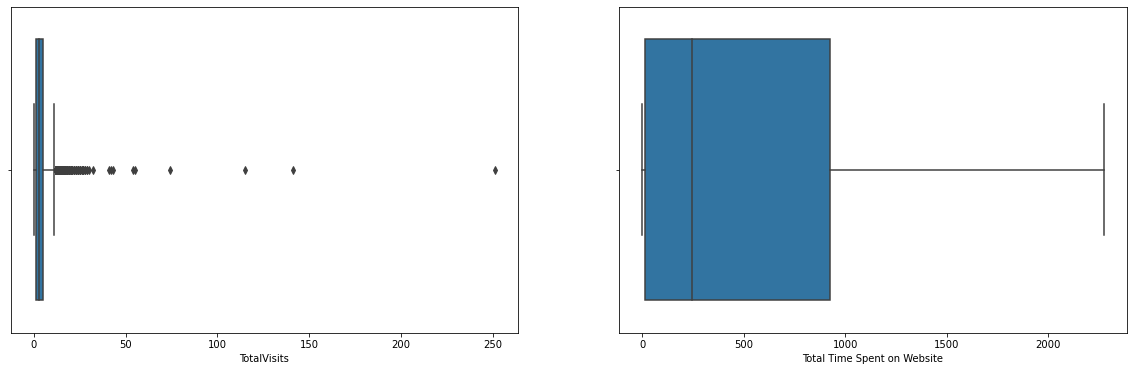

In [62]:
# Outlier Analysis
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(lead_df['TotalVisits'])
plt.subplot(1,2,2)
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.show();

Note: We dont have any outliers in 'Total Time Spent on Website' variable but we have in 'TotalVisits'. So we need to remove the outliers using soft capping method

In [63]:
# Outlier Treatment
q1 = lead_df['TotalVisits'].quantile(0.01)
q2 = lead_df['TotalVisits'].quantile(0.99)

In [64]:
lead_df['TotalVisits'][lead_df['TotalVisits']<=q1] = q1
lead_df['TotalVisits'][lead_df['TotalVisits']>=q2] = q2

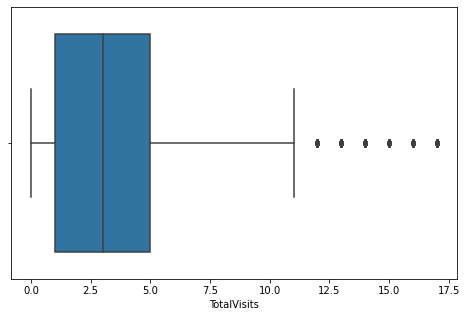

In [65]:
# visualizing the outliers after soft capping:
plt.figure(figsize=(8,5))
sns.boxplot(lead_df['TotalVisits'])
plt.show();

Note: The outliers which is there in 'TotalVisits' variable has been reduced drastically after outlier treatment by applying the soft capping method

#### Step 5: Data Pre-Processing (Creating Dummy Variables, Train-Test Split, Scaling)

In [66]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,Page Visited on Website,India,Finance Management,Unemployed,Mumbai,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,Email Opened,India,Finance Management,Unemployed,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,Email Opened,India,Business Administration,Student,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,Unreachable,India,Media and Advertising,Unemployed,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,Converted to Lead,India,Finance Management,Unemployed,Mumbai,No,Modified


##### Checking yes/no columns

In [67]:
lead_df['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [68]:
lead_df['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [69]:
# converting categorical variables with yes/no values to 1/0

cat_var = ['Do Not Email', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

lead_df[cat_var] = lead_df[cat_var].apply(binary_map)

In [70]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,Page Visited on Website,India,Finance Management,Unemployed,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,Email Opened,India,Finance Management,Unemployed,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,Email Opened,India,Business Administration,Student,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,Unreachable,India,Media and Advertising,Unemployed,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,Converted to Lead,India,Finance Management,Unemployed,Mumbai,0,Modified


##### Checking other categorical columns

In [71]:
lead_df['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [72]:
lead_df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
WeLearn                 1
blog                    1
youtubechannel          1
testone                 1
welearnblog_Home        1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [73]:
lead_df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [74]:
lead_df['Country'].value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Germany                    4
South Africa               4
Canada                     4
Kuwait                     4
Sweden                     3
Netherlands                2
Uganda                     2
Asia/Pacific Region        2
Ghana                      2
China                      2
Belgium                    2
Philippines                2
Italy                      2
Bangladesh                 2
Malaysia                   1
Kenya                      1
Vietnam                    1
Switzerland                1
Denmark                    1
Sri Lanka                  1
Indonesia     

In [75]:
lead_df['Specialization'].value_counts()

Finance Management                   4241
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [76]:
lead_df['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [77]:
lead_df['City'].value_counts()

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [78]:
lead_df['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
Form Submitted on Website          1
Email Received                     1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

Observation: 
We will club the values which is less than 3% as other category for the following variables:
        - Lead Source
        - Last Activity
        - Specialization
        - Last Notable Activity
And we can remove the variable 'Country' since it has more values pertaining to India

##### Dropping 'Country' variable from the dataset

In [79]:
lead_df.drop('Country', axis=1, inplace=True)

##### Calculating the percentage of the values for the variables that is going to club

In [80]:
lead_df['Lead Source'].value_counts()/len(lead_df)*100

Google               31.661891
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
Click2call            0.044082
Press_Release         0.022041
Live Chat             0.022041
Social Media          0.022041
WeLearn               0.011020
blog                  0.011020
youtubechannel        0.011020
testone               0.011020
welearnblog_Home      0.011020
Pay per Click Ads     0.011020
NC_EDM                0.011020
Name: Lead Source, dtype: float64

In [81]:
lead_df['Last Activity'].value_counts()/len(lead_df)*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Received                   0.022041
Email Marked Spam                0.022041
Resubscribed to emails           0.011020
Visited Booth in Tradeshow       0.011020
Name: Last Activity, dtype: float64

In [82]:
lead_df['Specialization'].value_counts()/len(lead_df)*100

Finance Management                   46.737933
Human Resource Management             9.224157
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Media and Advertising                 2.226141
Travel and Tourism                    2.226141
International Business                1.939608
Healthcare Management                 1.719198
E-COMMERCE                            1.223275
Hospitality Management                1.223275
Retail Management                     1.102050
Rural and Agribusiness                0.804496
E-Business                            0.628168
Services Excellence                   0.440820
Name: Specialization, dtype: float64

In [83]:
lead_df['Last Notable Activity'].value_counts()/len(lead_df)*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Approached upfront               0.011020
Resubscribed to emails           0.011020
Form Submitted on Website        0.011020
Email Received                   0.011020
View in browser link Clicked     0.011020
Name: Last Notable Activity, dtype: float64

##### Clubbing the values for the remaining variables

- Other Lead Source
- Other Last Activity
- Other Specialization
- Other Last Notable Activity

In [84]:
club = ['Lead Source', 'Last Activity', 'Specialization', 'Last Notable Activity']

In [85]:
for i in club:
    series = pd.value_counts(lead_df[i])
    mask = (series/series.sum() * 100).lt(3)
    lead_df[i] = np.where(lead_df[i].isin(series[mask].index),'Others',lead_df[i])
    print("Clubbing \033[1m {0} \033[0;0m".format(i))
    print(lead_df[i].value_counts())
    print('\n\n')

Clubbing  Lead Source 
Google            2873
Direct Traffic    2543
Olark Chat        1753
Organic Search    1154
Reference          443
Others             308
Name: Lead Source, dtype: int64



Clubbing  Last Activity 
Email Opened               3432
SMS Sent                   2716
Olark Chat Conversation     972
Page Visited on Website     640
Others                      574
Converted to Lead           428
Email Bounced               312
Name: Last Activity, dtype: int64



Clubbing  Specialization 
Finance Management                   4241
Others                               1228
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Name: Specialization, dtype: int64



Clubbing  Last Notable Activity 
Modified                   3267
Email Opene

### creating dummy variables

In [86]:
#Creating Dummy variables for 'Lead Origin'
D_LO =pd.get_dummies(lead_df['Lead Origin'], prefix='Lead Origin',drop_first= True)
#Append to main data frame
lead_df = pd.concat([lead_df,D_LO],axis=1)

In [87]:
#Creating Dummy variables for 'Lead Source'
D_LS =pd.get_dummies(lead_df['Lead Source'], prefix='Lead Source',drop_first= True)
#Append to main data frame
lead_df = pd.concat([lead_df,D_LS],axis=1)

In [88]:
#Creating Dummy variables for 'Specialization'
D_S =pd.get_dummies(lead_df['Specialization'], prefix='Specialization',drop_first= True)
#Append to main data frame
lead_df = pd.concat([lead_df,D_S],axis=1)

In [89]:
# Dummy variables for 'What is your current occupation'
D_CO =pd.get_dummies(lead_df['What is your current occupation'], prefix='Current Occupation', drop_first= True)
#Append to main data frame
lead_df = pd.concat([lead_df,D_CO],axis=1)

In [90]:
# Dummy variables for 'City'
D_C =pd.get_dummies(lead_df['City'], prefix='City',drop_first= True)
#Append to main data frame
lead_df = pd.concat([lead_df,D_C],axis=1)

In [91]:
#Dummy variables for "Last Activity"
D_LA =pd.get_dummies(lead_df['Last Activity'], prefix='Last Activity',drop_first= True)
#Append to main data frame
lead_df = pd.concat([lead_df,D_LA],axis=1)

In [92]:
#Dummy variables for "Last Notable Activity"
D_LNA =pd.get_dummies(lead_df['Last Notable Activity'],prefix='Last Notable Activity',drop_first= True)
#Append to main data frame
lead_df = pd.concat([lead_df, D_LNA],axis=1)

In [93]:
lead_df.shape

(9074, 49)

In [94]:
#Dropping original columns
lead_df.drop(['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'City', 'Last Activity', 'Last Notable Activity'], axis = 1, inplace = True)

In [95]:
lead_df.shape

(9074, 42)

In [96]:
lead_df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,660728,0,0,5.0,674,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,660681,0,1,2.0,1428,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [97]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 42 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Do Not Email                                   9074 non-null   int64  
 2   Converted                                      9074 non-null   int64  
 3   TotalVisits                                    9074 non-null   float64
 4   Total Time Spent on Website                    9074 non-null   int64  
 5   A free copy of Mastering The Interview         9074 non-null   int64  
 6   Lead Origin_Landing Page Submission            9074 non-null   uint8  
 7   Lead Origin_Lead Add Form                      9074 non-null   uint8  
 8   Lead Origin_Lead Import                        9074 non-null   uint8  
 9   Lead Source_Google                             9074 

##### Train-Test Split

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
# Putting feature variable to X
X = lead_df.drop(['Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,0,5.0,674,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,2.0,1532,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,2.0,1428,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [100]:
# Putting response variable to y
y = lead_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [102]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,0,2.0,397,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1012,1,2.0,190,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
9226,0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4750,0,2.0,1380,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
7987,0,5.0,1584,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0


In [103]:
X_train.shape

(6351, 40)

In [104]:
y_train.head()

3009    0
1012    0
9226    0
4750    1
7987    1
Name: Converted, dtype: int64

In [105]:
y_train.shape

(6351,)

##### Scaling

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website']])

In [108]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,0,-0.417238,-0.160255,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1012,1,-0.417238,-0.540048,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
9226,0,-1.034493,-0.888650,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4750,0,-0.417238,1.643304,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
7987,0,0.508645,2.017593,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0


In [109]:
# Verifying the Converted Rate
converted_rate = round((sum(lead_df['Converted'])/len(lead_df['Converted'].index)) * 100, 0)
converted_rate

38.0

##### Looking at Correlation

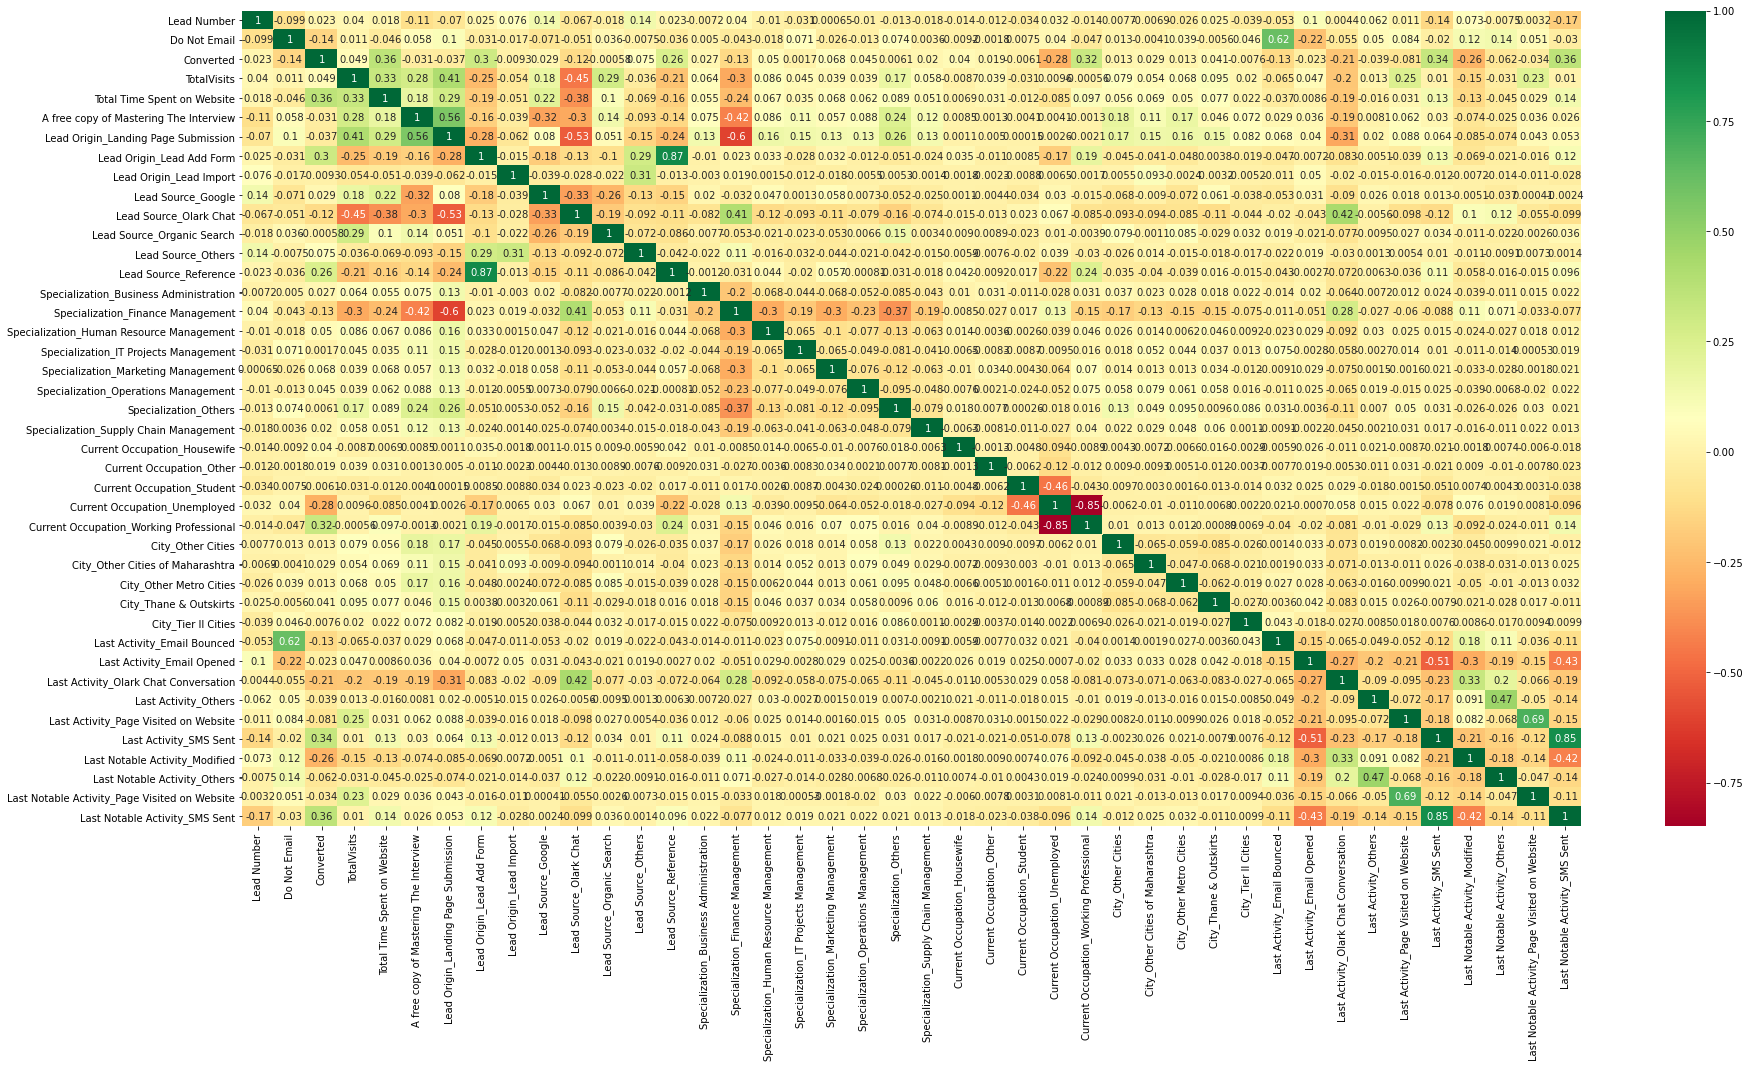

In [110]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        
sns.heatmap(lead_df.corr(), cmap = 'RdYlGn', annot = True)
plt.show()

Observation: Based on the above heatmap we found that the high correlation is between the following variables:
        - Last Notable Activity_SMS Sent
        - Last Notable Activity_Page Visited on Website
        - Lead Origin_Lead Add Form
So we can drop these variables

In [111]:
# Dropping highly correlated dummy variables
X_test = X_test.drop(['Last Notable Activity_SMS Sent', 'Last Notable Activity_Page Visited on Website', 'Lead Origin_Lead Add Form'], 1)
X_train = X_train.drop(['Last Notable Activity_SMS Sent', 'Last Notable Activity_Page Visited on Website', 'Lead Origin_Lead Add Form'], 1)

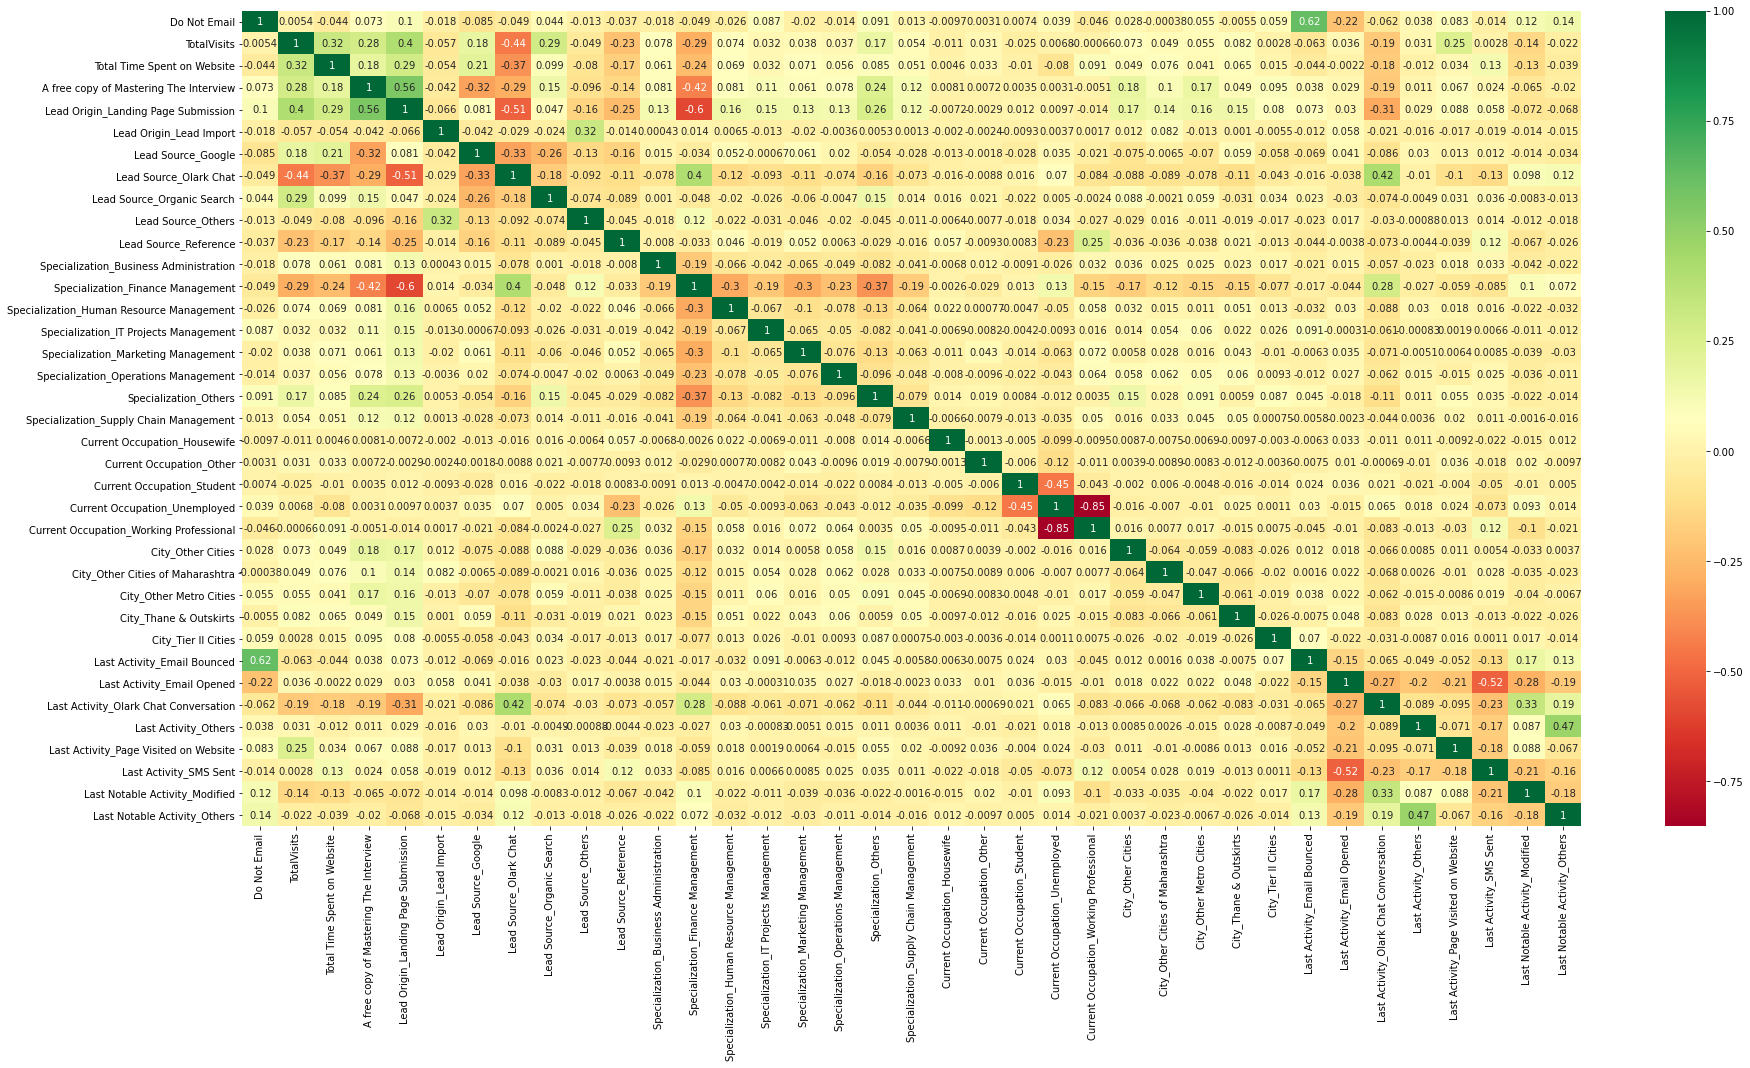

In [112]:
# After dropping highly correlated variables, reverifying the correlation matrix.
plt.figure(figsize = (30,15))
sns.heatmap(X_train.corr(), cmap = 'RdYlGn', annot = True)
plt.show()

Observation: After dropping the high correlated variables, we now have all the variables are correlated as expected. So we can go ahead with these variables for further processing

#### Step 6: Model Building

In [113]:
import statsmodels.api as sm

# Running Your First Training Model - Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2694.9
Date:                Mon, 08 Mar 2021   Deviance:                       5389.8
Time:                        21:03:00   Pearson chi2:                 6.59e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0757      1.093     -0.069      0.945      -2.218       2.067
Do Not Email                                -1.2687      0.191     -6.660      0.000      -1.642      -0.895
TotalVisits                                  0.0673      0.043      1.563      0.118      -0.017       0.152
Total Time Spent on Website                  1.0789      0.040     26.789      0.000       1.000       1.158
A free copy of Mastering The Interview      -0.0686      0.108     -0.637      0.524      -0.280       0.143
Lead Origin_Landing Page Submission         -0.5848      0.114     -5.132      0.000      -0.808      -0.361
Lead Origin_Lead Import                     -0.9765      0.490     -1.992      0.046      -1.937      -0.016
Lead Source_Google                           0.2622      0.113      2.325      0.020       0.041       0.483
Lead Source_Olark Chat                       1.1927      0.157      7.601      0.000       0.885       1.500
Lead Source_Organic Search                   0.0404      0.128      0.315      0.753      -0.211       0.292
Lead Source_Others                           2.2056      0.201     10.950      0.000       1.811       2.600
Lead Source_Reference                        3.6571      0.262     13.966      0.000       3.144       4.170
Specialization_Business Administration      -0.3171      0.240     -1.323      0.186      -0.787       0.153
Specialization_Finance Management           -0.6533      0.189     -3.462      0.001      -1.023      -0.284
Specialization_Human Resource Management    -0.2150      0.203     -1.057      0.290      -0.613       0.183
Specialization_IT Projects Management       -0.1332      0.246     -0.542      0.588      -0.615       0.349
Specialization_Marketing Management          0.0054      0.205      0.026      0.979      -0.396       0.407
Specialization_Operations Management        -0.2562      0.227     -1.127      0.260      -0.702       0.189
Specialization_Others                       -0.3602      0.196     -1.836      0.066      -0.745       0.024
Specialization_Supply Chain Management      -0.2120      0.246     -0.861      0.389      -0.695       0.271
Current Occupation_Housewife                21.8077   1.55e+04      0.001      0.999   -3.04e+04    3.05e+04
Current Occupation_Other                    -0.0115      1.298     -0.009      0.993      -2.555       2.532
Current Occupation_Student                  -0.6579      1.077     -0.611      0.541      -2.768       1.452
Current Occupation_Unemployed               -1.1318      1.053     -1.075      0.282      -3.195       0.932
Current Occupation_Working Professional      1.5962      1.068      1.494      0.135      -0.498       3.690
City_Other Cities              

Observation: Significance (p-values) is more for many of the variables

#### Step 7: Feature Selection using RFE

In [114]:
# running RFE with 15 variables as output
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [115]:
rfe.support_

array([ True, False,  True, False,  True,  True, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False,  True, False, False,  True, False, False,  True,  True,
       False])

In [116]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 17),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Specialization_Business Administration', False, 8),
 ('Specialization_Finance Management', False, 2),
 ('Specialization_Human Resource Management', False, 10),
 ('Specialization_IT Projects Management', False, 12),
 ('Specialization_Marketing Management', False, 20),
 ('Specialization_Operations Management', False, 9),
 ('Specialization_Others', False, 7),
 ('Specialization_Supply Chain Management', False, 11),
 ('Current Occupation_Housewife', True, 1),
 ('Current Occupation_Other', False, 18),
 ('Current Occupation_Student', True, 1),
 ('Current Occupatio

In [117]:
col = X_train.columns[rfe.support_]

In [118]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Supply Chain Management', 'Current Occupation_Other',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Notable Activity_Others'],
      dtype='object')

#### Step 8: Checking P-Value and VIF

##### Assessing the model with StatsModels

In [119]:
# Rebuilding the model after completing coarse tuning (RFE):
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2731.1
Date:                Mon, 08 Mar 2021   Deviance:                       5462.3
Time:                        21:03:05   Pearson chi2:                 6.53e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.3868      0.600      0.645      0.519      -0.789       1.563
Do Not Email                               -1.4139      0.166     -8.531      0.000      -1.739      -1.089
Total Time Spent on Website                 1.0918      0.040     27.483      0.000       1.014       1.170
Lead Origin_Landing Page Submission        -0.3671      0.088     -4.177      0.000      -0.539      -0.195
Lead Origin_Lead Import                    -0.8361      0.482     -1.734      0.083      -1.781       0.109
Lead Source_Olark Chat                      0.9457      0.119      7.928      0.000       0.712       1.180
Lead Source_Others                          1.9761      0.178     11.076      0.000       1.626       2.326
Lead Source_Reference                       3.6384      0.238     15.272      0.000       3.171       4.105
Current Occupation_Housewife               21.5373   1.57e+04      0.001      0.999   -3.07e+04    3.07e+04
Current Occupation_Student                 -0.9002      0.637     -1.413      0.158      -2.149       0.349
Current Occupation_Unemployed              -1.2996      0.598     -2.172      0.030      -2.472      -0.127
Current Occupation_Working Professional     1.4626      0.625      2.341      0.019       0.238       2.687
City_Tier II Cities                        -0.6011      0.448     -1.342      0.180      -1.479       0.277
Last Activity_Olark Chat Conversation      -1.1032      0.167     -6.608      0.000      -1.430      -0.776
Last Activity_SMS Sent                      1.3084      0.073     17.912      0.000       1.165       1.452
Last Notable Activity_Modified             -0.9088      0.079    -11.576      0.000      -1.063      -0.755
===========================================================================================================
"""

Observation: Significance (p-values) has come down to normal for many of the variables

In [120]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.189258
1012    0.372591
9226    0.368737
4750    0.860881
7987    0.789595
1281    0.736797
2880    0.096036
4971    0.922311
7536    0.847111
1248    0.759185
dtype: float64

In [121]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18925794, 0.37259102, 0.36873667, 0.86088124, 0.78959537,
       0.73679698, 0.09603555, 0.92231115, 0.84711095, 0.75918478])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [122]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.189258,3009
1,0,0.372591,1012
2,0,0.368737,9226
3,1,0.860881,4750
4,1,0.789595,7987


Observation: The prediction accuracy looks pretty decent here

##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [123]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.189258,3009,0
1,0,0.372591,1012,0
2,0,0.368737,9226,0
3,1,0.860881,4750,1
4,1,0.789595,7987,1


Observation: The original value and the predicted value are exactly matching here

In [124]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3455  450]
 [ 765 1681]]


In [125]:
# Predicted     not_converted    converted
# Actual
# not_converted        3455      450
# converted            765       1681  

In [126]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8086915446386396


#### Checking VIFs

In [127]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Current Occupation_Unemployed,5.97
2,Lead Origin_Landing Page Submission,3.76
4,Lead Source_Olark Chat,2.35
14,Last Notable Activity_Modified,1.85
13,Last Activity_SMS Sent,1.61
12,Last Activity_Olark Chat Conversation,1.58
10,Current Occupation_Working Professional,1.56
6,Lead Source_Reference,1.44
1,Total Time Spent on Website,1.31
5,Lead Source_Others,1.27


Note: Based on the high significance (p-value) in Housewife variable, we are dropping that

In [128]:
# dropping the values which has high VIF and high p-value, lets start by dropping the Housewife
col = col.drop(["Current Occupation_Housewife","Current Occupation_Unemployed"], 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Current Occupation_Student', 'Current Occupation_Working Professional',
       'City_Tier II Cities', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified'],
      dtype='object')

In [129]:
# Rebuilding the modelbased on manual tuning (p-values and VIF):
X_train_sm = sm.add_constant(X_train[col])
lom2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = lom2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2738.1
Date:                Mon, 08 Mar 2021   Deviance:                       5476.3
Time:                        21:03:07   Pearson chi2:                 6.56e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8985      0.084    -10.642      0.000      -1.064      -0.733
Do Not Email                               -1.4121      0.166     -8.529      0.000      -1.737      -1.088
Total Time Spent on Website                 1.0930      0.040     27.552      0.000       1.015       1.171
Lead Origin_Landing Page Submission        -0.3701      0.088     -4.220      0.000      -0.542      -0.198
Lead Origin_Lead Import                    -0.8369      0.482     -1.736      0.083      -1.782       0.108
Lead Source_Olark Chat                      0.9382      0.119      7.874      0.000       0.705       1.172
Lead Source_Others                          1.9660      0.178     11.029      0.000       1.617       2.315
Lead Source_Reference                       3.6651      0.238     15.406      0.000       3.199       4.131
Current Occupation_Student                  0.3896      0.225      1.729      0.084      -0.052       0.831
Current Occupation_Working Professional     2.7524      0.188     14.609      0.000       2.383       3.122
City_Tier II Cities                        -0.6078      0.448     -1.357      0.175      -1.486       0.270
Last Activity_Olark Chat Conversation      -1.1064      0.167     -6.631      0.000      -1.433      -0.779
Last Activity_SMS Sent                      1.2977      0.073     17.794      0.000       1.155       1.441
Last Notable Activity_Modified             -0.9081      0.078    -11.589      0.000      -1.062      -0.755
===========================================================================================================
"""

Observation: Significance (p-values) is still more for 3 variables. So we will drop one by one based on the values

In [130]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19095674, 0.37318776, 0.36770401, 0.86117802, 0.79018724,
       0.73710944, 0.09692223, 0.92272744, 0.84897951, 0.75980136])

In [131]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [132]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.190957,3009,0
1,0,0.373188,1012,0
2,0,0.367704,9226,0
3,1,0.861178,4750,1
4,1,0.790187,7987,1


Observation: The original value and the predicted value are exactly matching here

In [133]:
# Let's check the overall accuracy.
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(accuracy)

0.807746811525744


In [134]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.66
12,Last Notable Activity_Modified,1.65
4,Lead Source_Olark Chat,1.61
10,Last Activity_Olark Chat Conversation,1.56
11,Last Activity_SMS Sent,1.45
1,Total Time Spent on Website,1.29
6,Lead Source_Reference,1.24
8,Current Occupation_Working Professional,1.18
5,Lead Source_Others,1.16
0,Do Not Email,1.13


Observation: VIF value looks fine for all the variables

In [135]:
# dropping the values which has high p-value (>0.05), lets start by dropping the City_Tier II Cities

col = col.drop('City_Tier II Cities', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Current Occupation_Student', 'Current Occupation_Working Professional',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified'],
      dtype='object')

In [136]:
# Rebuilding the modelbased on manual tuning (p-values and VIF):
X_train_sm = sm.add_constant(X_train[col])
lom3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = lom3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2739.1
Date:                Mon, 08 Mar 2021   Deviance:                       5478.2
Time:                        21:03:09   Pearson chi2:                 6.56e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8978      0.084    -10.635      0.000      -1.063      -0.732
Do Not Email                               -1.4190      0.165     -8.585      0.000      -1.743      -1.095
Total Time Spent on Website                 1.0927      0.040     27.557      0.000       1.015       1.170
Lead Origin_Landing Page Submission        -0.3767      0.088     -4.301      0.000      -0.548      -0.205
Lead Origin_Lead Import                    -0.8383      0.482     -1.739      0.082      -1.783       0.106
Lead Source_Olark Chat                      0.9378      0.119      7.871      0.000       0.704       1.171
Lead Source_Others                          1.9670      0.178     11.034      0.000       1.618       2.316
Lead Source_Reference                       3.6648      0.238     15.404      0.000       3.199       4.131
Current Occupation_Student                  0.3934      0.225      1.746      0.081      -0.048       0.835
Current Occupation_Working Professional     2.7492      0.188     14.611      0.000       2.380       3.118
Last Activity_Olark Chat Conversation      -1.1056      0.167     -6.626      0.000      -1.433      -0.779
Last Activity_SMS Sent                      1.2970      0.073     17.789      0.000       1.154       1.440
Last Notable Activity_Modified             -0.9092      0.078    -11.607      0.000      -1.063      -0.756
===========================================================================================================
"""

Observation: Significance (p-values) is still more for 2 variables. So we will drop one by one based on the values

In [137]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19006295, 0.36947405, 0.3674209 , 0.86033989, 0.78884014,
       0.73578906, 0.09643257, 0.9226891 , 0.84813718, 0.7583265 ])

In [138]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [139]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.190063,3009,0
1,0,0.369474,1012,0
2,0,0.367421,9226,0
3,1,0.860340,4750,1
4,1,0.788840,7987,1


Observation: The original value and the predicted value are exactly matching here

In [140]:
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(accuracy)

0.8079042670445599


In [141]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.65
11,Last Notable Activity_Modified,1.65
4,Lead Source_Olark Chat,1.61
9,Last Activity_Olark Chat Conversation,1.55
10,Last Activity_SMS Sent,1.45
1,Total Time Spent on Website,1.29
6,Lead Source_Reference,1.24
8,Current Occupation_Working Professional,1.18
5,Lead Source_Others,1.16
0,Do Not Email,1.13


Observation: VIF value looks fine for all the variables

In [142]:
# dropping the values which has high p-value (>0.05), lets start by dropping the 'Lead Origin_Lead Import'

col = col.drop('Lead Origin_Lead Import', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Current Occupation_Student', 'Current Occupation_Working Professional',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified'],
      dtype='object')

In [143]:
# Rebuilding the modelbased on manual tuning (p-values and VIF):
X_train_sm = sm.add_constant(X_train[col])
lom3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = lom3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.7
Date:                Mon, 08 Mar 2021   Deviance:                       5481.4
Time:                        21:03:11   Pearson chi2:                 6.55e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9033      0.084    -10.701      0.000      -1.069      -0.738
Do Not Email                               -1.4125      0.165     -8.555      0.000      -1.736      -1.089
Total Time Spent on Website                 1.0948      0.040     27.615      0.000       1.017       1.172
Lead Origin_Landing Page Submission        -0.3732      0.088     -4.261      0.000      -0.545      -0.202
Lead Source_Olark Chat                      0.9422      0.119      7.908      0.000       0.709       1.176
Lead Source_Others                          1.8717      0.169     11.082      0.000       1.541       2.203
Lead Source_Reference                       3.6699      0.238     15.426      0.000       3.204       4.136
Current Occupation_Student                  0.3948      0.225      1.753      0.080      -0.047       0.836
Current Occupation_Working Professional     2.7460      0.188     14.588      0.000       2.377       3.115
Last Activity_Olark Chat Conversation      -1.0995      0.167     -6.596      0.000      -1.426      -0.773
Last Activity_SMS Sent                      1.3002      0.073     17.844      0.000       1.157       1.443
Last Notable Activity_Modified             -0.9070      0.078    -11.586      0.000      -1.060      -0.754
===========================================================================================================
"""

Observation: Significance (p-values) is still more for 1 variable. So we will drop that

In [144]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18969756, 0.3695253 , 0.36801155, 0.86089006, 0.79008834,
       0.73638847, 0.09609634, 0.92281031, 0.84860242, 0.75963993])

In [145]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [146]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.189698,3009,0
1,0,0.369525,1012,0
2,0,0.368012,9226,0
3,1,0.860890,4750,1
4,1,0.790088,7987,1


Observation: The original value and the predicted value are exactly matching here

In [147]:
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(accuracy)

0.8036529680365296


In [148]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.65
10,Last Notable Activity_Modified,1.65
3,Lead Source_Olark Chat,1.61
8,Last Activity_Olark Chat Conversation,1.55
9,Last Activity_SMS Sent,1.45
1,Total Time Spent on Website,1.29
5,Lead Source_Reference,1.24
7,Current Occupation_Working Professional,1.18
0,Do Not Email,1.13
4,Lead Source_Others,1.04


Observation: VIF value looks fine for all the variables

In [149]:
# dropping the values which has high p-value (>0.05), lets start by dropping the 'Current Occupation_Student'

col = col.drop('Current Occupation_Student', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Current Occupation_Working Professional',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified'],
      dtype='object')

In [150]:
# Rebuilding the model based on manual tuning (p-values and VIF):
X_train_sm = sm.add_constant(X_train[col])
lom3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = lom3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2742.2
Date:                Mon, 08 Mar 2021   Deviance:                       5484.4
Time:                        21:03:13   Pearson chi2:                 6.55e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8938      0.084    -10.617      0.000      -1.059      -0.729
Do Not Email                               -1.4108      0.165     -8.540      0.000      -1.735      -1.087
Total Time Spent on Website                 1.0946      0.040     27.616      0.000       1.017       1.172
Lead Origin_Landing Page Submission        -0.3690      0.088     -4.216      0.000      -0.540      -0.197
Lead Source_Olark Chat                      0.9463      0.119      7.942      0.000       0.713       1.180
Lead Source_Others                          1.8674      0.169     11.068      0.000       1.537       2.198
Lead Source_Reference                       3.6793      0.238     15.480      0.000       3.213       4.145
Current Occupation_Working Professional     2.7358      0.188     14.543      0.000       2.367       3.105
Last Activity_Olark Chat Conversation      -1.0946      0.167     -6.569      0.000      -1.421      -0.768
Last Activity_SMS Sent                      1.2929      0.073     17.792      0.000       1.150       1.435
Last Notable Activity_Modified             -0.9113      0.078    -11.644      0.000      -1.065      -0.758
===========================================================================================================
"""

Observation: Significance (p-values) is now 0 for all the variables as expected

In [151]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19182162, 0.37075777, 0.36848012, 0.86161576, 0.79036443,
       0.73759327, 0.09731061, 0.92293579, 0.8502893 , 0.7599496 ])

In [152]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [153]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.191822,3009,0
1,0,0.370758,1012,0
2,0,0.368480,9226,0
3,1,0.861616,4750,1
4,1,0.790364,7987,1


Observation: The original value and the predicted value are exactly matching here

In [154]:
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(accuracy)

0.8069595339316643


Observation: The accuracy score that we are getting for train set for this model is 80.69%

In [155]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,Last Notable Activity_Modified,1.65
2,Lead Origin_Landing Page Submission,1.63
3,Lead Source_Olark Chat,1.60
7,Last Activity_Olark Chat Conversation,1.55
8,Last Activity_SMS Sent,1.45
1,Total Time Spent on Website,1.29
5,Lead Source_Reference,1.23
6,Current Occupation_Working Professional,1.18
0,Do Not Email,1.13
4,Lead Source_Others,1.04


Observation: All variables now have a VIF and p-values are within range

#### Metrics beyond accuracy

In [156]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3440,  465],
       [ 761, 1685]], dtype=int64)

In [157]:
#Predicted    ->     not_converted    converted
#Actual
#not_converted        3440             465
#converted            761             1685 

In [158]:
# Confusion Matrix
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [159]:
# Verifying Sensitivity of our logistic regression model
sensitivity = TP / float(FN+TP)
print(sensitivity)

0.6888798037612428


Observation: The Sensitivity score that we are getting for train set for this model is 68.88%

In [160]:
# Verifying Specificity of our logistic regression model
specificity = TN / float(TN+FP)
print(specificity)

0.8809218950064021


Observation: The Specificity score that we are getting for train set for this model is 88.09%

In [161]:
# Calculate the false positive rate -  predicting conversion when customer does not have converted
print( FP / float(TN+FP) )

0.11907810499359796


Observation: The false positive rate that we are getting for train set for this model is 11.90%

In [162]:
# Positive predicted value
print( TP / float(TP+FP))

0.7837209302325582


Observation: The Positive predicted value that we are getting for train set for this model is 78.37%

In [163]:
# Negative predicted values
print( TN / float(TN+FN))

0.8188526541299691


Observation: The Negative predicted value that we are getting for train set for this model is 81.88%

#### Step9: Plotting the ROC curve

In [164]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [165]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

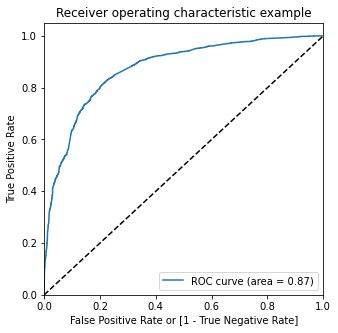

In [166]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Observation: ROC Area under curve is 0.87

#### Step 10: Finding optimal probability cutoff

In [167]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.191822,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.370758,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.368480,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.861616,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.790364,7987,1,1,1,1,1,1,1,1,1,0,0


In [168]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.578649  0.971382  0.332650
0.2   0.2  0.733900  0.916190  0.619718
0.3   0.3  0.790584  0.838921  0.760307
0.4   0.4  0.805542  0.764922  0.830986
0.5   0.5  0.806960  0.688880  0.880922
0.6   0.6  0.777988  0.558463  0.915493
0.7   0.7  0.770587  0.491006  0.945711
0.8   0.8  0.742245  0.375715  0.971831
0.9   0.9  0.692647  0.220360  0.988476


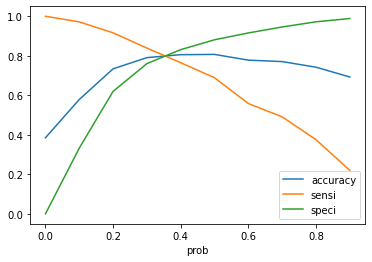

In [169]:
#Plotting the graph above
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Observation: Optimal cutoff point based on the above graph would be 0.38. So leads having probability conversion more than 38% are considered as hot leads

In [170]:
y_train_pred_final['Final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.191822,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.370758,1012,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.368480,9226,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.861616,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.790364,7987,1,1,1,1,1,1,1,1,1,0,0,1


Observation: The original value and the predicted value are almost same here

In [171]:
# Let's check the overall accuracy.
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)
accuracy

0.7905841599748071

Observation: The final acuracy score that we are getting after ROC and optimal cutoff for train set for this model is 79.05%

In [172]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_predicted )
confusion2

array([[2969,  936],
       [ 394, 2052]], dtype=int64)

In [173]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [174]:
# Verifying the Sensitivity of our logistic regression model
TP / float(TP+FN)

0.83892068683565

Observation: The final Sensitivity score that we are getting after ROC and optimal cutoff for train set for this model is 83.89%

In [175]:
# Verifying the specificity of our logistic regression model
TN / float(TN+FP)

0.7603072983354674

Observation: The final Specificity score that we are getting after ROC and optimal cutoff for train set for this model is 76.03%

In [176]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23969270166453266


Observation: The final false positive rate that we are getting after ROC and optimal cutoff for train set for this model is 23.96%

In [177]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6867469879518072


Observation: The final Positive predicted value that we are getting after ROC and optimal cutoff for train set for this model is 68.67%

In [178]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8828426999702647


Observation: The final Negative predicted value that we are getting after ROC and optimal cutoff for train set for this model is 88.28%

##### Precision and Recall

In [179]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3440,  465],
       [ 761, 1685]], dtype=int64)

##### Precision
##### TP / TP + FP

In [180]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7837209302325582

Observation: The final Precision score that we are getting after ROC and optimal cutoff for train set for this model is 78.37%

##### Recall
##### TP / TP + FN

In [181]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6888798037612428

Observation: The final Recall score that we are getting after ROC and optimal cutoff for train set for this model is 68.88%

In [182]:
# Tradeoff between precision and Recall
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

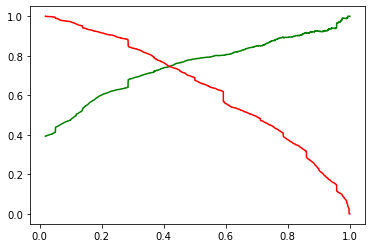

In [183]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Step 11: Model Evaluation and Model Performance
#####  Making predictions on the test set

In [184]:
X_test[['TotalVisits', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website']])

In [185]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Current Occupation_Working Professional,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,0
1490,0,1.887326,1,0,0,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0
4216,0,-0.888650,0,0,0,1,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0


In [186]:
# adding constant
X_test_sm = sm.add_constant(X_test)

In [187]:
# Making prediction
y_test_pred = res.predict(X_test_sm)

In [188]:
y_test_pred[:10]

3271    0.174908
1490    0.971773
7936    0.152139
4216    0.711247
3830    0.129414
1800    0.657670
6507    0.335462
4821    0.296117
4223    0.957125
4714    0.368480
dtype: float64

In [189]:
# Creating dataframe for prediction dataset
y_pred_1 = pd.DataFrame(y_test_pred)

In [190]:
y_pred_1.head()

,0
3271,0.174908
1490,0.971773
7936,0.152139
4216,0.711247
3830,0.129414


In [191]:
# Assigning index to Target variable 'Lead Number'
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [192]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [193]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Lead Number,0
0,0,3271,0.174908
1,1,1490,0.971773
2,0,7936,0.152139
3,1,4216,0.711247
4,0,3830,0.129414


In [194]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

y_pred_final.head(10)

,Converted,Lead Number,Conversion_Prob
0,0,3271,0.174908
1,1,1490,0.971773
2,0,7936,0.152139
3,1,4216,0.711247
4,0,3830,0.129414
5,1,1800,0.657670
6,0,6507,0.335462
7,0,4821,0.296117
8,1,4223,0.957125
9,0,4714,0.368480


In [195]:
y_pred_final['Final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

y_pred_final.head()

,Converted,Lead Number,Conversion_Prob,Final_predicted
0,0,3271,0.174908,0
1,1,1490,0.971773,1
2,0,7936,0.152139,0
3,1,4216,0.711247,1
4,0,3830,0.129414,0


Observation: The prediction accuracy are exactly same here for the above mentioned rows

In [196]:
# Let's check the overall accuracy.
accuracy_test = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_predicted)
accuracy_test

0.8035255233198678

Observation: The final acuracy score that we are getting for test set for this model is 80.35%

In [197]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_predicted )
confusion_test

array([[1435,  299],
       [ 236,  753]], dtype=int64)

In [198]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [199]:
# Verifying the sensitivity of our logistic regression model on test set
sensitivity_test = TP / float(TP+FN)
sensitivity_test

0.7613751263902933

Observation: The final Sensitivity score that we are getting for test set for this model is 76.13%

In [200]:
# Verifying the specificity
specificity_test = TN / float(TN+FP)
specificity_test

0.8275663206459054

Observation: The final Specificity score that we are getting for test set for this model is 82.75%

##### Precision
##### TP / TP + FP

In [201]:
precision_score(y_pred_final.Converted, y_pred_final.Final_predicted)

0.7157794676806084

Observation: The final Precision score that we are getting after ROC and optimal cutoff for train set for this model is 71.57%

## Final Observation:

Let us compare the values obtained for Train & Test:

| | Train Data | Test Data |
| :- | -: | :-: |
| Accuracy | 79.05% | 80.35% |
| Sensitivity | 83.89% | 76.13% |
| Specificity | 76.03% | 82.75% |
| Precision | 78.37% | 71.57% |

Conclusion: The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model performance